In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting problem constants
p_i=2.64E-04 #cost of a VM ($/s)
p_n=3.50E-06 #cost of data transfer ($/KB)
H=8.50E-05 #static Hosting cost ($/s)
RPM=0.7 #revenue per 1000 ads ($)
R=100 #response time (ms)
gamma_l=1 #gamma lower bound (gamma is average number of ad banners per page)
gamma_u=25 #gamma upper bound
R_l=10 # respose time lower bound
R_u=3500 # response time upper bound
d_l=15 #capacity of each VM lower bound(request/s)
d_u=21 #capacity of each VM upper bound(request/s)

# Experiment 2
$$W_s = 0.0$$
$$W_a = 1.0$$
$$W_u = 0.0$$

In [10]:
exp1 = pd.read_csv("../data/EXP-2.csv")

In [11]:
exp1.drop('_id',axis=1,inplace=True)

In [12]:
exp1.set_index('cycle',inplace=True)

In [14]:
exp1.sort_values('cycle',inplace=True)

In [16]:
exp1

,requests,concurrent_users,arrival_rate,response_time,data_payload,predicted_p_s,predicted_W,predicted_gamma,date
cycle,,,,,,,,,
1,20,5,82.87,60.336,378,0.001352,5.460917,4.103406,2020-09-20T07:39:37.018Z
2,1000,100,91.47,1093.293,589,0.002250,4.862150,4.180078,2020-09-20T07:40:54.947Z
3,400,50,91.48,546.575,589,0.002127,6.102869,4.231654,2020-09-20T07:43:11.149Z
4,300,30,90.93,329.922,589,0.002161,6.222716,4.311462,2020-09-20T07:44:18.923Z
5,160,20,96.73,206.756,589,0.002079,5.586111,4.146668,2020-09-20T07:45:23.305Z
...,...,...,...,...,...,...,...,...,...
866,160,20,94.31,212.056,589,0.002144,6.366105,4.338604,2020-09-21T09:17:33.398Z
867,100,10,92.97,107.566,589,0.002083,4.376300,3.942404,2020-09-21T09:18:37.584Z
868,100,20,85.90,232.817,589,0.002098,4.577560,3.999888,2020-09-21T09:21:50.876Z


In [17]:
exp1['W'] = exp1['predicted_W'].apply(lambda x: 10 if x>10 else np.ceil(x))
exp1.fillna(method='ffill',inplace=True)

## Number of containers

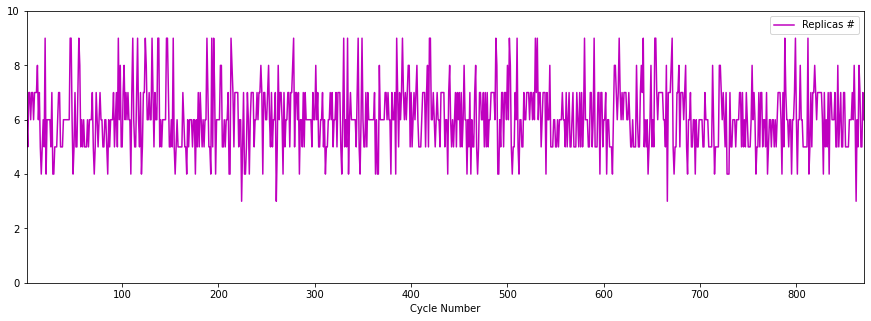

In [19]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
exp1['W'].plot(legend=True,label='Replicas #',color='m')
plt.xlabel('Cycle Number')
ax.set_ylim(0,10)
plt.savefig('exp2/replicas_number.png')

## Response time vs. Arrival rate

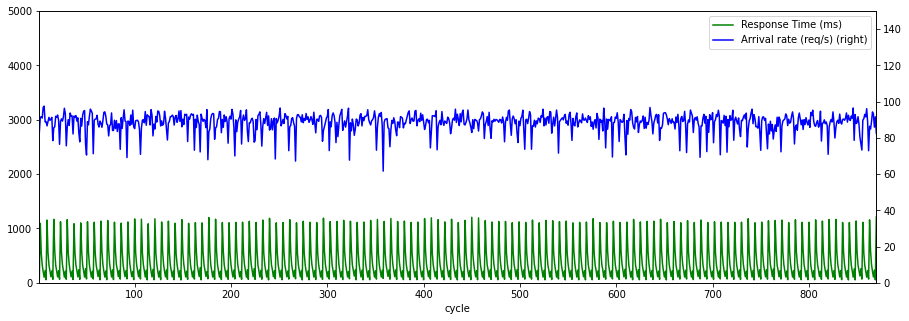

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
exp1['response_time'].plot(legend=True,label='Response Time (ms)',color='g')
exp1['arrival_rate'].plot(legend=True,label='Arrival rate (req/s)',secondary_y=True,color='b')
ax.set_ylim(0,5000)
ax.right_ax.set_ylim([0,150])

plt.savefig('exp2/response_time_vs_arrival_rate.png')

## service price vs avg. number of ads

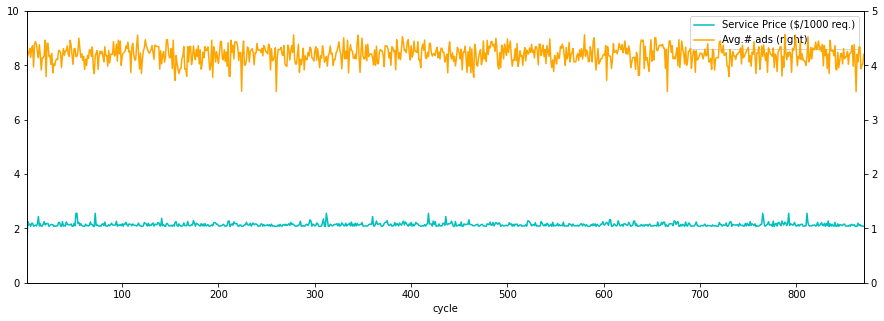

In [22]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
# plt.figure(num=None,)
# Plot the first x and y axes:
(exp1['predicted_p_s']*1000).plot(legend=True,label='Service Price ($/1000 req.)',color='c')
exp1['predicted_gamma'].plot(legend=True,label='Avg.# ads',secondary_y=True,color='orange')
ax.set_ylim(0,10)
ax.right_ax.set_ylim([0,5])
plt.savefig('exp2/service_price_vs_#_of_ads.png')

## Service profit vs. Client profit vs user satisfaction

In [24]:
exp1['service_profit'] = exp1['predicted_p_s']*exp1['arrival_rate'] - p_i*exp1['W'] - exp1['data_payload']*p_n*exp1['arrival_rate']
exp1['client_profit'] = (exp1['predicted_gamma']*RPM/1000 - H - exp1['predicted_p_s'])*exp1['arrival_rate']
exp1['user_satisfaction'] = 0.5*(gamma_u - exp1['predicted_gamma'])/(gamma_u-gamma_l) + 0.5*(R_u - exp1['response_time'])/(R_u - R_l)

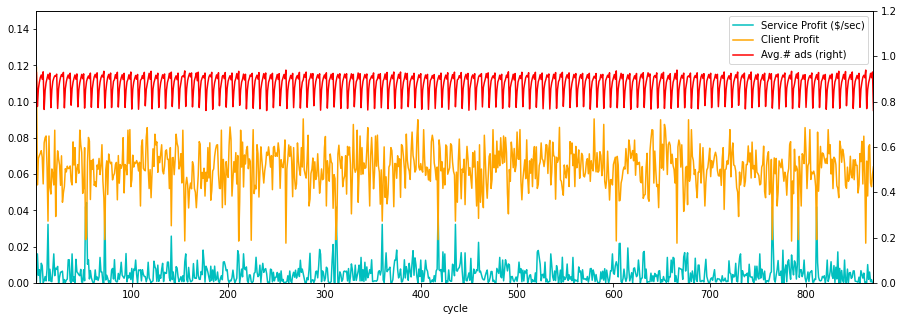

In [25]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
# plt.figure(num=None,)
# Plot the first x and y axes:
exp1['service_profit'].plot(legend=True,label='Service Profit ($/sec)',color='c')
exp1['client_profit'].plot(legend=True,label='Client Profit',color='orange')
exp1['user_satisfaction'].plot(legend=True,label='Avg.# ads',secondary_y=True,color='r')
ax.set_ylim(0,0.15)
ax.right_ax.set_ylim([0,1.2])
plt.savefig('exp2/service_profit_vs_client_profit_user_satisfaction.png')